Author: Dr. Göktuğ Aşcı <br>
Email: gok.asci@student.ie.edu <br>
Date: 2021-02-06 <br>
Language and Version: Python 3.8.5 <br>
Licence: MIT License <br>
Data: [Titanic Survivor Data](https://www.kaggle.com/c/titanic/data)

## Question 1 - Exploratory Data Analysis

### Data and Module Imports

We are importing pandas, numpy, matplotlib and seaborn libraries for numerical computation and graphing in Python.

In [ ]:
# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the csv file in the same directory with the PassengerId index column:

In [ ]:
# Question 1.1
titanic = pd.read_csv('train.csv', index_col="PassengerId")
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


We are going to calculate and print percentages quite often. Therefore, I created custom functions to reduce repetitive code.

In [ ]:
# A custom function to calculate percentages
def calc_perc(top, bottom, decimals=2):
  return round(top/bottom * 100, decimals)

In [ ]:
# This function simply creates a prettier percentage print out of total for a binary value datasets
def print_perc(series, key_list, key_name_list):
  # Calculate seperate value counts for each type
  series = series.value_counts(normalize=True)
  # Create percentage values for each item
  key_0_perc = calc_perc(series[key_list[0]], (series[key_list[1]] + series[key_list[0]]))
  key_1_perc = calc_perc(series[key_list[1]], (series[key_list[1]] + series[key_list[0]]))
  # Print values
  print('{}: {}, {}: {}'.format(key_name_list[0], key_0_perc, key_name_list[1], key_1_perc))

In [ ]:
# List all columns
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

The main columns that we are going to use through this assignment:
* Survived: Survived the shipwreck or not (0 or 1)
* Sex: Sex of the person
* Age: Age of the person (It has missing values and needs to be imputed)
* Pclass: Ticket class -> 1 = 1st, 2 = 2nd, 3 = 3rd
* Embarked: Port of Embarkation -> C = Cherbourg, Q = Queenstown, S = Southampton
* SibSp: # of siblings / spouses aboard the Titanic
* Parch: # of parents / children aboard the Titanic

You can find the [data set on Kaggle](https://www.kaggle.com/c/titanic/data) for more details.

### Calculate Percentage of Survivors Out of Total

We make sure that we don't have null values in the Survived column

In [ ]:
# Check if the Survived column is complete
titanic['Survived'].isnull().sum() # 0 means no null values

0

Thanks to our predefined function we can easily print percentages in binary columns with a simple function print_perc:

In [ ]:
# Question 1.2.1
# Percentage calculation
survived_series = titanic['Survived']
print_perc(survived_series, [1, 0], ['Survived %', 'Not survived %'])

Survived %: 38.38, Not survived %: 61.62


The Titanic shipwreck was a total diseaster, only 38.38% of people survived the accident.

### Calculate Percentage of Men and Women

In [ ]:
# All possible values of the Sex column
titanic['Sex'].unique() # array([male, female])

array(['male', 'female'], dtype=object)

In [ ]:
# Question 1.2.2
# Percentage calculation
sex_series = titanic['Sex']
print_perc(sex_series, ['male', 'female'], ['Male %', 'Female %'])

Male %: 64.76, Female %: 35.24


There are much more men than women in Titanic during that trip.

### Percentage of Survivors by Sex

In [ ]:
# Question 1.3.1
# Percentage calculation
male_survived_series = titanic[titanic['Sex'] == 'male']['Survived']
print_perc(male_survived_series, [1, 0], ['Survived male %', 'Not survived male %'])

Survived male %: 18.89, Not survived male %: 81.11


In [ ]:
# Question 1.3.2
# Percentage calculation
female_survived_series = titanic[titanic['Sex'] == 'female']['Survived']
print_perc(female_survived_series, [1, 0], ['Survived female %', 'Not survived female %'])

Survived female %: 74.2, Not survived female %: 25.8


As we can see above, for an unknown reason (probably women have been given priority for rescue boats etc.) women have a much higher survival ratio compared to men.

### The Sex Distribution

In [ ]:
# Question 1.3.3
# Percentage calculation
survived_sex_series = titanic[titanic['Survived'] == 1]['Sex']
print_perc(survived_sex_series, ['female', 'male'], ['Survived female %', 'Survived male %'])

Survived female %: 68.13, Survived male %: 31.87


This data shows that more than 2/3 of people who survived the Titanic shipwreck were women.

### Probability Sex, Survival Data Frame

It is a good practice to create a copy of the imported data frame since we may use the intact version in different contexts.

In [ ]:
# Create a copy
titanic_c1 = titanic.copy()

# Calculate total person count for future use
total_length = len(titanic_c1)

Create another column to store "Not survived" values which is going to be the exact opposite of the Survived column - We are going to keep this column for future use:

In [ ]:
# Add another Not survived column to create the desired on the data frame 
titanic_c1.loc[titanic_c1['Survived'] == 0, 'Not survived'] = 1
titanic_c1.loc[titanic_c1['Not survived'] != 1, 'Not survived'] = 0 # We know that there are no null values in this column
titanic_c1['Not survived'] = titanic_c1['Not survived'].astype(np.int) # Turn float column to int

Let's create a data frame showing the total survival ratio among different Sexes:

In [ ]:
# Question 1.4
# Group by Sex -> Calculate sums for each cell -> Calculate the percentages
sex_age_pclass_perc = titanic_c1.groupby(['Sex']).apply(lambda x: x.sum()).unstack()[['Survived', 'Not survived']].apply(lambda x: x * 100 / total_length)

# Convert values to float and round to two decimals
sex_age_pclass_perc.astype(float).round(2)

,Survived,Not survived
Sex,,
female,26.15,9.09
male,12.23,52.53


###Probability Sex, Survival, Pclass Data Frame

We can create deeper subgroups just by adding new columns to the groupby method. In this case we are adding Pclass feature to create Pclass subgroups for the Survived column:

In [ ]:
# Question 1.5
# Group by Sex and Pclass -> Calculate sums for each cell -> Calculate the percentages
sex_age_pclass_perc = titanic_c1.groupby(['Sex', 'Pclass']).apply(lambda x: x.sum()).unstack()[['Survived', 'Not survived']].apply(lambda x: x * 100 / total_length)

# Convert values to float and round to two decimals
sex_age_pclass_perc.astype(float).round(2)

Survived  Not survived
Sex    Pclass                        
female 1          10.21          0.34
       2           7.86          0.67
       3           8.08          8.08
male   1           5.05          8.64
       2           1.91         10.21
       3           5.27         33.67

## Question 2 - Imputing the Age Column

Create another copy to work on:

In [ ]:
# Create a copy
titanic_c2 = titanic.copy()

We are going to check how many null values exist in the Age column:

In [ ]:
titanic_c2['Age'].isnull().sum()

177

In [ ]:
# Let's have a deeper look
titanic_c2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Sadly, there are 177 null columns in the Age column. Let's discover the types of each column to be able to work on it for deeper analysis:

In [ ]:
# Check types of columns
titanic_c2.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

Some values may be entered incorrectly. This is where the domain knowledge comes into play. But our case is quite simple here since it is enough to know that the Age column cannot be lower than zero.

In [ ]:
# Check if there are values lower than zero -> there are no values lower than 0, this is great
len(titanic_c2[titanic_c2['Age'] < 0])

0

Next, we are going to create a correlation heatmap among all feature to see if any feature affects the Age variable. 
Before checking columns that may have correlation with the Age column, we are removing a few irrelevant string columns:

In [ ]:
# Removing the string columns that are irrelevant for our analysis
titanic_c2 = titanic_c2.drop(['Name', 'Ticket', 'Cabin'], 1)

To include the Sex column in the correlation heatmap we need to convert the values into flag variables: (0: "male", 1: "female")

In [ ]:
# Code Sex column as 0 and 1
titanic_c2.loc[titanic_c2['Sex'] == 'male', 'Sex'] = 0
titanic_c2.loc[titanic_c2['Sex'] == 'female', 'Sex'] = 1
titanic_c2['Sex'] = titanic_c2['Sex'].astype(np.int) 

People who come from different ports may have different age medians. For this possibility, let's try to include the Embarked column in the correlation heatmap by converting values into flag variables:

In [ ]:
# Check if we have null values in the Embarked column
titanic_c2['Embarked'].isnull().sum()

2

Since there are only two null values for the Embarked column, I am going to convert nulls into flag variables, too rather than removing the whole row that may cause information loss for other columns: (0: "C", 1: "Q", 2: "S", 3: nan)

In [ ]:
# Convert the Embarked column as flag variables
titanic_c2.loc[titanic_c2['Embarked'] == 'C', 'Embarked'] = 0
titanic_c2.loc[titanic_c2['Embarked'] == 'Q', 'Embarked'] = 1
titanic_c2.loc[titanic_c2['Embarked'] == 'S', 'Embarked'] = 2
titanic_c2.loc[titanic_c2['Embarked'].isnull(), 'Embarked'] = 3 # There are only 2 nulls
titanic_c2['Embarked'] = titanic_c2['Embarked'].astype(np.int) 

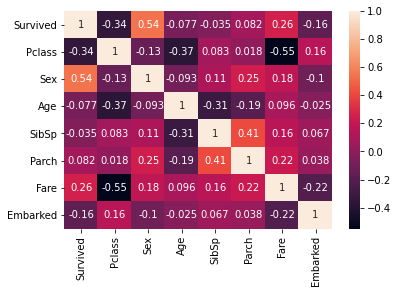

In [ ]:
# This heatmap show correlations between variables
sns.heatmap(titanic_c2.corr(), annot=True);

Using the heatmap above, we can see that "Pclass", "Parch" and "SibSp" columns have slight correlations with the Age column.

Since we modified titanic_c2 to be able to get an accurate correlation table, we are going to create another copy for the final data frame:


In [ ]:
# Create two copies
titanic_c3 = titanic.copy()
titanic_final = titanic.copy()

Let's observe subgroup medians:

In [ ]:
titanic_c3.groupby(["Pclass", "SibSp", "Parch"])["Age"].median()

Pclass  SibSp  Parch
1       0      0        38.50
               1        37.50
               2        22.00
        1      0        36.00
               1        46.00
               2        14.00
               4        64.00
        2      0        50.00
               2        19.50
        3      2        23.00
2       0      0        31.00
               1        26.50
               2        13.00
        1      0        29.50
               1        23.50
               2        24.50
               3        54.00
        2      0        24.00
               1        13.50
               3        24.00
        3      0        30.00
3       0      0        26.00
               1        18.00
               2        24.00
               3        24.00
               4        29.00
               5        40.00
        1      0        25.00
               1        19.00
               2        13.50
               3        32.00
               4        42.50
               5   

We created subgroups of combinations "Pclass", "Parch" and "SibSp" medians and impute the Age values according to these subgroup medians:

In [ ]:
# Impute the subgroups by the transform method
titanic_final["Age"] = titanic_final["Age"].fillna(titanic_c3.groupby(["Pclass", "SibSp", "Parch"])["Age"].transform("median"))

In [ ]:
# Check if we could impute all the values
titanic_final["Age"].isnull().sum()

7

Ooops! Why couldn't we impute all the values at once? Since we have null values for the Age column, some subgroups (in this case the one at the bottom) don't even include any values for the Age column so that we cannot calculate median values for those.

Let's verify that the subgroup has 7 items:

In [ ]:
# The subgroup with no median value since they all have null Age columns
missing_subgroup = titanic_c3[(titanic_c3['Pclass'] == 3) & (titanic_c3['SibSp'] == 8) & (titanic_c3['Parch'] == 2)]
missing_subgroup

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [ ]:
len(missing_subgroup)

7

We should try different combinations of the most correlated features. We can check the effect of different columns by comparing model metrics with different features. I selected "Pclass" and "Parch" features in this case since they are among the most correlated features. But one can try different combinations.

In [ ]:
# Impute the subgroups by the transform method
titanic_final["Age"] = titanic_final["Age"].fillna(titanic_c3.groupby(["Pclass", "Parch"])["Age"].transform("median"))

In [ ]:
# Check if we could impute all the values
titanic_final["Age"].isnull().sum() # Congrats

0

Congragulations, we have succesfully imputed all missing age values for seperate subgroups! Let's have a final look at the data frame with the relevant columns:

In [ ]:
# A final look at the data frame relevant columns
titanic_final.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,26.0,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


Let's get important information regarding the final Data Frame

In [ ]:
titanic_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


As we can see above, we have succesfully imputed all the values in the Age column. Now, the data set is ready to be used for modelling.

Data imputing is one of the most important components of model training because if we put garbage in, we get garbage out. Usually, data engineers are responsible for this stage but data scientists may also have to prepare the data before the model training stage.  